In [1]:
#%load_ext cudf.pandas
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [2]:
####load the original and CNN classification for the test sample
data = pd.read_csv('/luidhy_docker/astrodados/DELVE_MORPHOLOGY_DATA/analysis_code_morphology/CNN_testes_simples/imagetraining_balanced.csv')
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61928 entries, 0 to 61927
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   QUICK_OBJECT_ID    61928 non-null  int64  
 1   objID              61928 non-null  int64  
 2   RA                 61928 non-null  float64
 3   DEC                61928 non-null  float64
 4   ra_add             61928 non-null  float64
 5   dec_add            61928 non-null  float64
 6   MAG_AUTO_G         61928 non-null  float64
 7   MAG_AUTO_R         61928 non-null  float64
 8   MAG_AUTO_I         61928 non-null  float64
 9   MAG_AUTO_Z         61928 non-null  float64
 10  SPREAD_MODEL_I     61928 non-null  float64
 11  SPREADERR_MODEL_I  61928 non-null  float64
 12  CLASS_STAR_R       61928 non-null  float64
 13  FLAGS_R            61928 non-null  float64
 14  MOD_CLASS          61928 non-null  float64
 15  Pdisk              61928 non-null  float64
 16  Pedgeon            619

In [3]:
####load the CNN classification
data_cnn = pd.read_csv('results/results_alltest_classification_largebestsample_model4.csv')
df_cnn = pd.DataFrame(data_cnn)
#df_cnn['id'] = df_cnn['id'].str.replace('.png', '')
df_cnn.rename(columns={'id': 'QUICK_OBJECT_ID'}, inplace=True)
df_cnn['QUICK_OBJECT_ID'] = df_cnn['QUICK_OBJECT_ID'].astype('int64')
df_cnn.head()
df_cnn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137275 entries, 0 to 137274
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   QUICK_OBJECT_ID         137275 non-null  int64  
 1   Spiral_Probability      137275 non-null  float64
 2   Elliptical_Probability  137275 non-null  float64
 3   Predicted_Class         137275 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 4.2+ MB


In [4]:
##merging the  files 
merged_df = pd.merge(df, df_cnn, on="QUICK_OBJECT_ID")
#merged_df.to_csv('new_model/model_results/results_epoch50_earlycallback.csv',index=False)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61928 entries, 0 to 61927
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   QUICK_OBJECT_ID         61928 non-null  int64  
 1   objID                   61928 non-null  int64  
 2   RA                      61928 non-null  float64
 3   DEC                     61928 non-null  float64
 4   ra_add                  61928 non-null  float64
 5   dec_add                 61928 non-null  float64
 6   MAG_AUTO_G              61928 non-null  float64
 7   MAG_AUTO_R              61928 non-null  float64
 8   MAG_AUTO_I              61928 non-null  float64
 9   MAG_AUTO_Z              61928 non-null  float64
 10  SPREAD_MODEL_I          61928 non-null  float64
 11  SPREADERR_MODEL_I       61928 non-null  float64
 12  CLASS_STAR_R            61928 non-null  float64
 13  FLAGS_R                 61928 non-null  float64
 14  MOD_CLASS               61928 non-null

In [5]:
# Replacing 'spheroid' with 'elliptical' and 'disk' with 'spiral'
merged_df['class'] = df['class'].replace({'spheroid': 'eliptical', 'disk': 'spiral'})
print(merged_df['Predicted_Class'],merged_df['class'])

0           spiral
1           spiral
2           spiral
3           spiral
4           spiral
           ...    
61923    eliptical
61924    eliptical
61925    eliptical
61926    eliptical
61927    eliptical
Name: Predicted_Class, Length: 61928, dtype: object 0           spiral
1           spiral
2           spiral
3           spiral
4           spiral
           ...    
61923    eliptical
61924    eliptical
61925    eliptical
61926    eliptical
61927    eliptical
Name: class, Length: 61928, dtype: object


In [6]:
####ROC stuff for spirals
true_labels_spiral = (merged_df['class'] == 'spiral').astype(int)
predicted_probabilities_spiral = merged_df['Spiral_Probability']

fpr_spiral, tpr_spiral, thresholds_spiral = roc_curve(true_labels_spiral, predicted_probabilities_spiral)
roc_auc_spiral = auc(fpr_spiral, tpr_spiral)

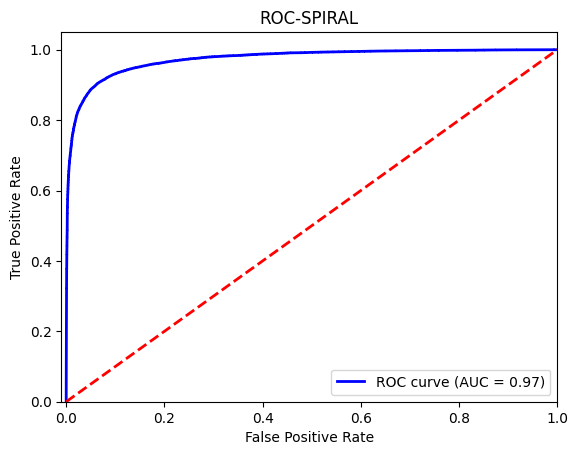

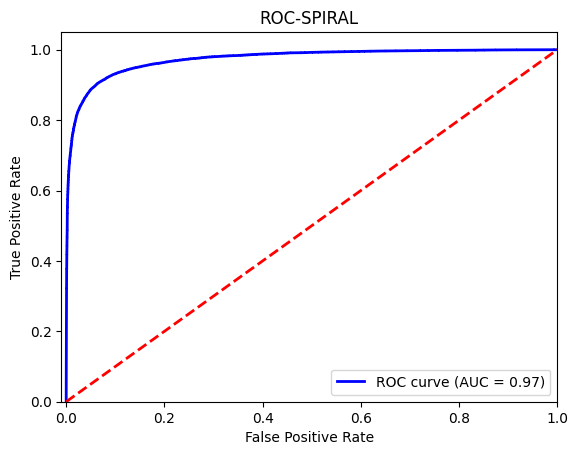

In [8]:
plt.figure()
plt.plot(fpr_spiral, tpr_spiral, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_spiral:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-SPIRAL')
plt.legend(loc='lower right')
plt.show()
#plt.savefig("results/ROCspiral_default_largebestsample_model4_ok.png",facecolor='white',dpi=150)

In [9]:
#ROC stuff for eliptical
true_labels_eliptical = (merged_df['class'] == 'eliptical').astype(int)
predicted_probabilities_eliptical = merged_df['Elliptical_Probability']

fpr_eliptical, tpr_eliptical, thresholds_eliptical = roc_curve(true_labels_eliptical, predicted_probabilities_eliptical)
roc_auc_eliptical = auc(fpr_eliptical, tpr_eliptical)

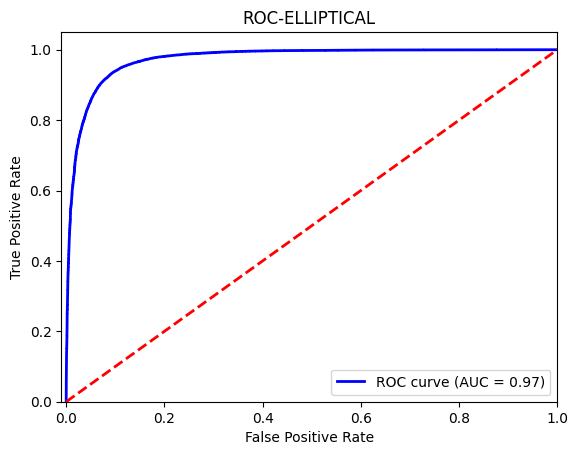

In [10]:
plt.figure()
plt.plot(fpr_eliptical, tpr_eliptical, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_eliptical:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-ELLIPTICAL')
plt.legend(loc='lower right')
plt.show()
#plt.savefig("results/ROCelliptical_default_largebestsample_model4_ok.png",facecolor='white',dpi=150)

In [11]:
#####starting the confusion matrix
###setting class to be 0 or 1
class_dict = {"spiral": 0, "eliptical": 1}

y_true = merged_df["class"].map(class_dict).values
y_pred = merged_df["Predicted_Class"].map(class_dict).values

cm = confusion_matrix(y_true, y_pred)
print(cm)

[[26084  4880]
 [  926 30038]]


In [12]:
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

print("Precision for Spiral class:", precision[0])
print("Precision for Elliptical class:", precision[1])
print(recall)

Precision for Spiral class: 0.9657164013328396
Precision for Elliptical class: 0.8602440002291082
[0.84239762 0.9700943 ]


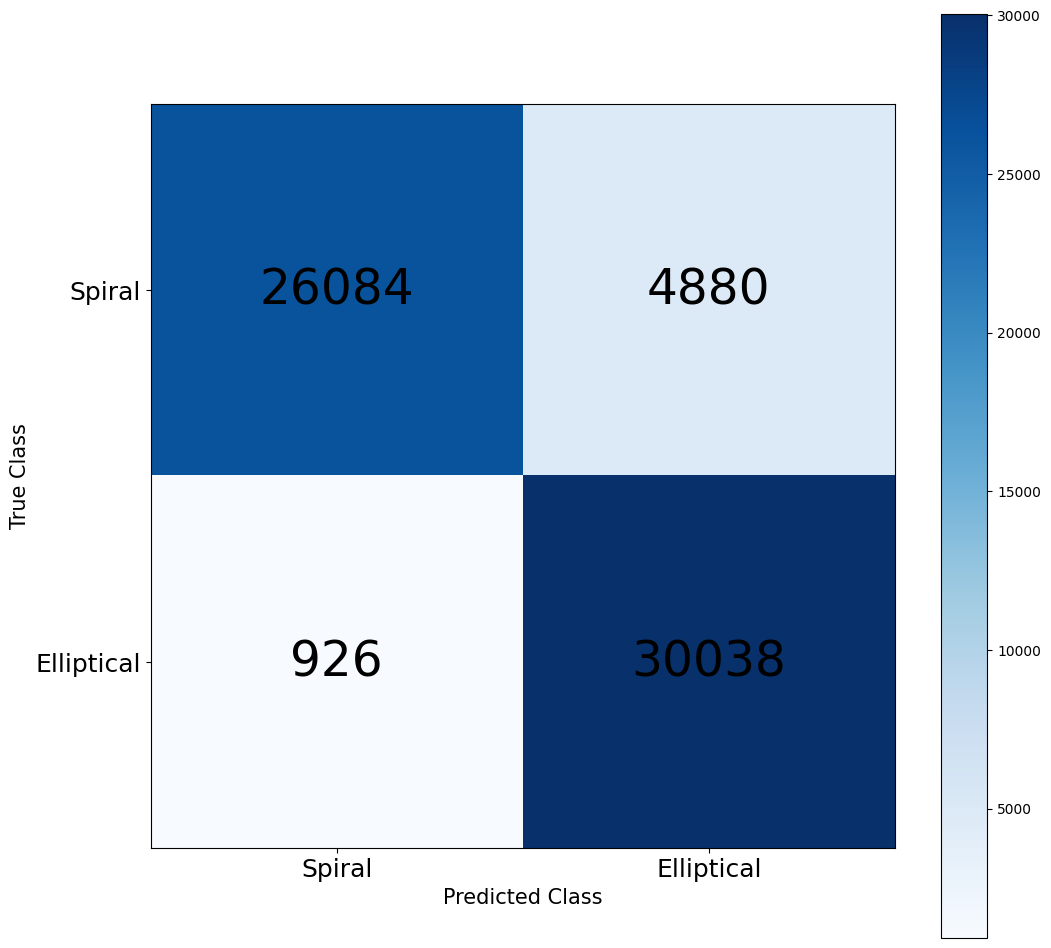

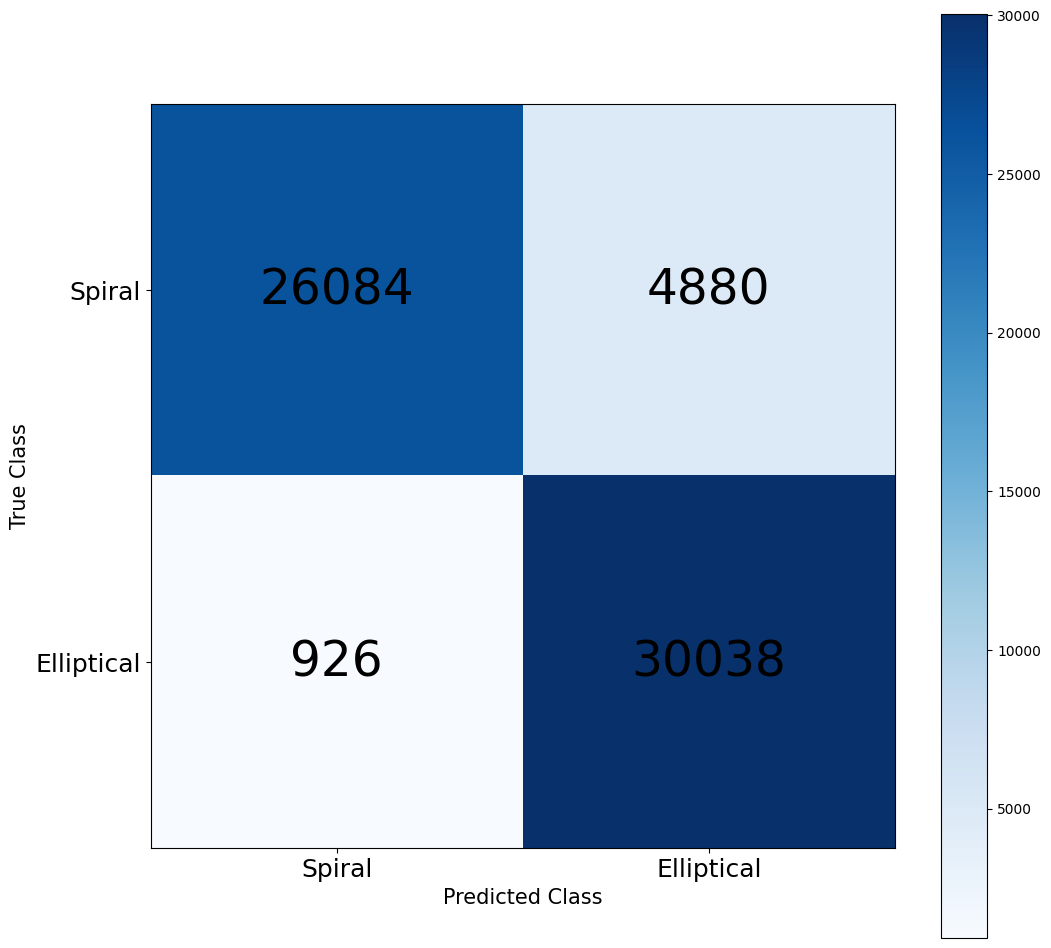

In [14]:
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(cm, interpolation="nearest", cmap='Blues')
for i in range(len(cm)):
    for j in range(len(cm)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="black",fontsize=35)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Spiral", "Elliptical"],fontsize=18)
ax.set_yticklabels(["Spiral", "Elliptical"],fontsize=18)
ax.set_xlabel("Predicted Class", fontsize=15)
ax.set_ylabel("True Class", fontsize=15)
cbar = ax.figure.colorbar(im, ax=ax)
plt.show()
#plt.savefig("results/CM_default_largebestsample_model4_ok.png",facecolor='white',dpi=150)